In [1]:
import pandas as pd

data = pd.read_csv("data/steam_reviews.csv")

# RQ3 

## What is the most common time the authors review an application?

In [2]:
from datetime import datetime as dt    #useful to work with timestamp
from matplotlib import pyplot as plt   #useful to plot result
from collections import Counter        #useful to count occurances

#convert all timestamp datas in dates and get only time
timestamp = [x for x in data.timestamp_created if not pd.isnull(x)]
t = [dt.fromtimestamp(x).time() for x in timestamp]
#count occurances
most_common_time = Counter(t).most_common(1)[0]

print("\nThe most common time of reviews is:", most_common_time[0],"with", most_common_time[1], "occurances.\n")


The most common time of reviews is: 16:54:53 with 586 occurances.



In [3]:
def reviewPerIntervals(interval): #plot the number of reviews for each of the intervals in times
    #get hour from our time_datas
    h = [x.hour for x in t]
    #create the intervals of time
    trange = [dt.strptime(x[:][0],"%H:%M:%S").hour for x in intervals]
    #add the las interval of time manually otherwise we miss to count the review between 20-24
    trange.append(24)
    trange = sorted(trange)
    #create the bin to count and plot the occurances in each interval
    count = pd.cut(h, trange)
    #plot the result
    count.value_counts().plot(kind='bar',rot = 0, color = "b" )
    plt.xlabel('Time intervals')
    plt.ylabel('Number of reviews')


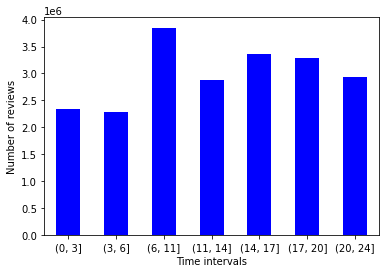

In [4]:
#plot the number of reviews in each given interval
intervals = [["06:00:00","10:59:59"],
             ["11:00:00","13:59:59"],
             ["14:00:00","16:59:59"],
             ["17:00:00","19:59:59"],
             ["20:00:00","23:59:59"],
             ["00:00:00","02:59:59"],
             ["03:00:00","05:59:59"]]

reviewPerIntervals(intervals)

# RQ4

## What are the top 3 languages used to review applications?

In [5]:
languages = data.language
#get the 3 most used languages
most_common_len = Counter(languages).most_common(3)

print("\nThe most common languages used to review applications are:\n",
     "-",most_common_len[0][0],"with", most_common_len[0][1], "occurances\n",
     "-",most_common_len[1][0],"with", most_common_len[1][1], "occurances\n",
     "-",most_common_len[2][0],"with", most_common_len[2][1], "occurances\n",)


The most common languages used to review applications are:
 - english with 9635437 occurances
 - schinese with 3764967 occurances
 - russian with 2348900 occurances



In [6]:
def languageFilter(data, languages):
    return data[data.language.isin(languages)]

## How many of them were voted as funny?

In [7]:
top3 = [most_common_len[0][0],most_common_len[1][0],most_common_len[2][0]]

#filtering data in order to get reviews in specific languages
top3df = languageFilter(data, top3)
#get the percentage of funny reviews
perc_f = len(top3df[top3df.votes_funny > 0])/len(top3df)

print("\nThe", round(perc_f*100,2),"% of the reviews were voted as funny.")


The 12.21 % of the reviews were voted as funny.


## How many of them were voted as helpful?

In [8]:
#get the percentage of helpful reviews
perc_h = len(top3df[top3df.votes_helpful > 0])/len(top3df)

print("\nThe", round(perc_h*100,2),"% of the reviews were voted as helpful.")


The 29.16 % of the reviews were voted as helpful.
